In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [80]:
                        # Fill in the following 3 variables
################################################################################################
files = ["../../datasets/short/ZGC_short.log", "../../datasets/short/ShenandoahGC_short.log"] 
labels = ["ZGC Short", "Shenandoah Short"]
time_range_seconds = [0, 200]
time_range_seconds = None  
################################################################################################
from src.compare_logs import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds)

## How to use filter_by and group_by

> ### `filter_by` : list of tuples -> (col, val), where column is a column in the gc_event_dataframe, and val is the EXACT value each row must match to remain in the dataset. Setting val = None means ANY non "None" value will remain in the dataset. 
> Example: `filter_by = [("EventType", "Pause")]` #     Only looks at rows that represent a Pause

> Example: `filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]` # Only looks at rows that include allocation for both Before & After gc

<br />

> ### `group_by` string, representing a column in the gc_event_dataframe. For each unique value in each log, a new group is created and independently plotted. leaving group_by = None means all data after filters shall be a group
> Example: `group_by "EventName"` 

## Compare STW pauses during runtime

Text(0, 0.5, 'Pause duration in miliseconds')

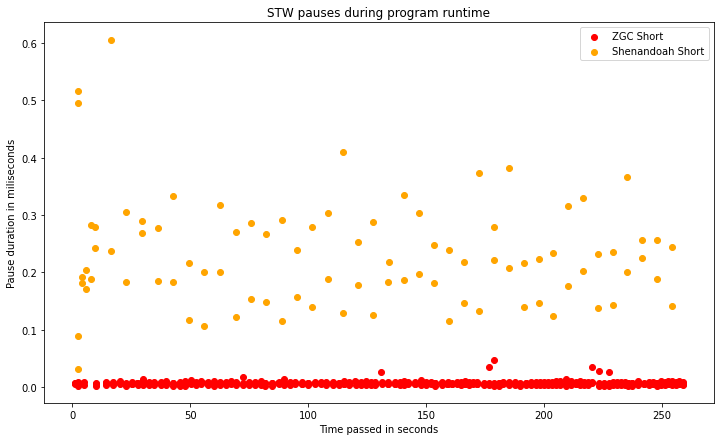

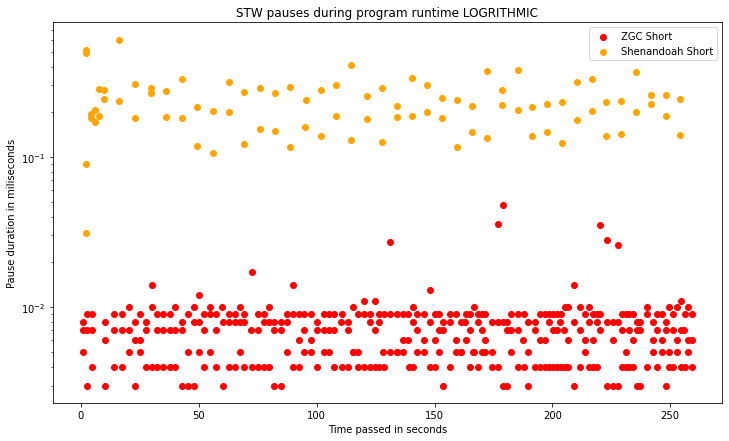

In [121]:
from new_graphing import scatter

# Chart #1, linear Y axis
graph = scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels=labels)
_ = graph.set_title("STW pauses during program runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

############################################################################################################

# Chart #2, logritmic Y axos
graph = scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels = labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("STW pauses during program runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

## Concurrent durations during runtime

Text(0, 0.5, 'Concurrent durations in miliseconds')

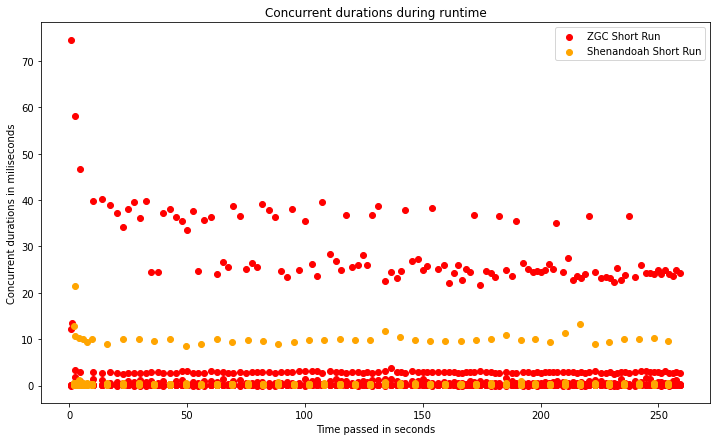

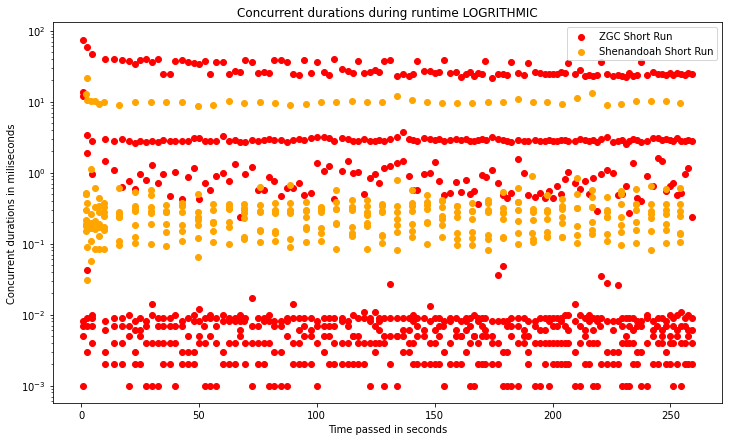

In [16]:
from new_graphing import scatter
# Linear graph
graph = scatter(gc_event_dataframes, labels=labels)
_ = graph.set_title("Concurrent durations during runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

# Logrithmic Graph
graph = scatter(gc_event_dataframes, labels=labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("Concurrent durations during runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

## Time spent in STW vs. Concurrent

['ZGC Short Run', 'Shenandoah Short Run']
Pause
Concurrent
Concurrent
Pause


(array([0, 1, 2, 3]),
 [Text(0, 0, 'ZGC Short Run: Pause'),
  Text(1, 0, 'ZGC Short Run: Concurrent'),
  Text(2, 0, 'Shenandoah Short Run: Concurrent'),
  Text(3, 0, 'Shenandoah Short Run: Pause')])

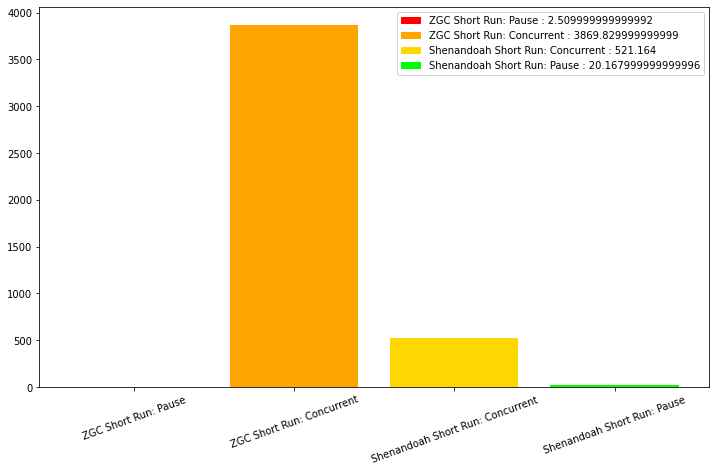

In [70]:
from new_graphing import bar_sum
print(labels)
graph = bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = [("Duration_miliseconds", None)], labels= labels)
plt.xticks(rotation = 20)


## Comparing Trends within the data

In [85]:
from new_graphing import trends
trends(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels,
       throughput=True)
print("\n")
trends(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)
print("\n")

trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)


 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
ZGC Short               | 348          | 0.048        | 2.51         | 0.0072       | 0.0043       | 100.0%       | 
Shenandoah Short        | 88           | 0.606        | 20.168       | 0.2292       | 0.093        | 99.99%       | 


 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
ZGC Short               | 348          | 0.048        | 2.51         | 0.0072       | 0.0043       | 
Shenandoah Short        | 88           | 0.606        | 20.168       | 0.2292       | 0.093        | 


 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
-----------------------

## Percentiles of event durations

In [93]:
from new_graphing import percentiles
percentiles(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)
print("\n")
percentiles(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)
print("\n")

percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-93-d68c2a99e73e>, line 17)

## Mean durations in miliseconds, pauses

<AxesSubplot:>

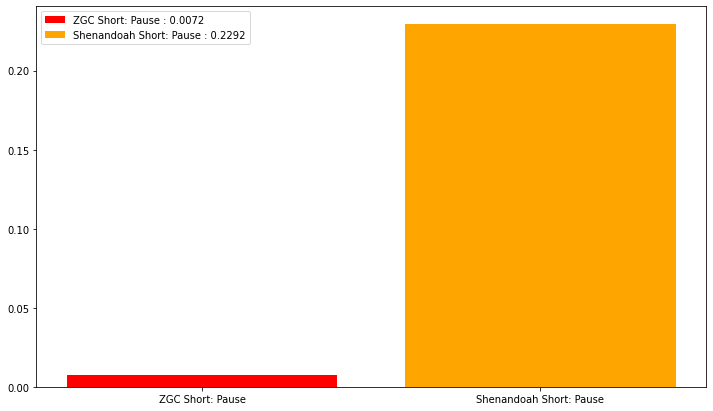

In [98]:

from new_graphing import bar_avg

bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = [("EventType", "Pause")], labels = labels)

## Heap allocation used before & after GC

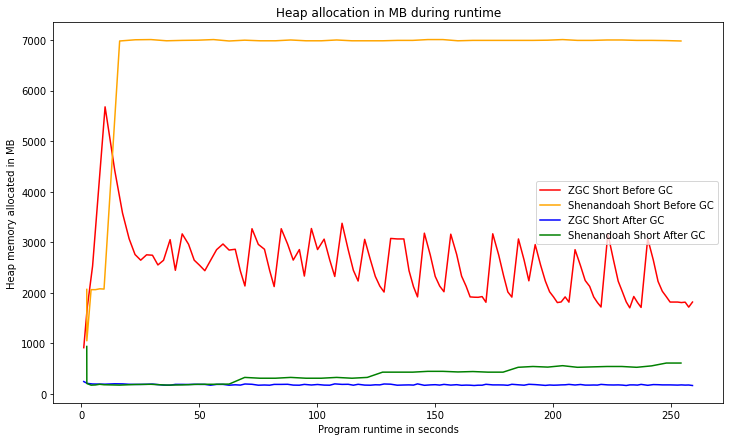

In [114]:
from new_graphing import line

graph = line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapBeforeGC", None)],
            labels = [label + " Before GC" for label in labels], 
            column = "HeapBeforeGC")

graph = line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapAfterGC", None)],
            labels = [label + " After GC" for label in labels], 
            column = "HeapAfterGC", axs = graph, colors = ["blue", "green"])

_ = graph.set_title("Heap allocation in MB during runtime")
_ = graph.set_ylabel("Heap memory allocated in MB")
_ = graph.set_xlabel("Program runtime in seconds")

## MB reclaimed during GC during runtime

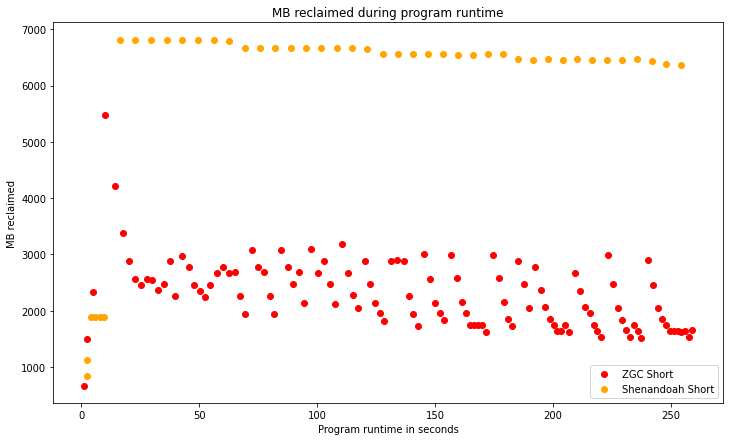

In [120]:
from new_graphing import reclaimed_bytes
filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]
graph = reclaimed_bytes(gc_event_dataframes, filter_by = filter_by, labels = labels)
_ = graph.set_title("MB reclaimed during program runtime")
_ = graph.set_ylabel("MB reclaimed")
_ = graph.set_xlabel("Program runtime in seconds")
